In [1]:
import numpy as np # library to handle data in a vectorized manner
import requests # library to handle requests
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import matplotlib.pyplot as plt
%matplotlib inline
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
df=pd.read_csv('/Users/Vishnu/Downloads/Data Science/Per_Capita_Income.csv')

In [3]:
df.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
2,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
3,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
4,5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6


In [4]:
df=df[["COMMUNITY AREA NAME","PER CAPITA INCOME","HARDSHIP INDEX"]]

In [5]:
df.head()

,COMMUNITY AREA NAME,PER CAPITA INCOME,HARDSHIP INDEX
0,Rogers Park,23939,39
1,West Ridge,23040,46
2,Uptown,35787,20
3,Lincoln Square,37524,17
4,North Center,57123,6


In [6]:
locator = Nominatim(user_agent="locator")

In [7]:
df_geo = pd.DataFrame(columns = ['COMMUNITY AREA NAME', 'Latitude', 'Longitude'])
for x in df['COMMUNITY AREA NAME']:
    location = locator.geocode(x + "," + "Chicago")
    latitude = location.latitude
    longitude = location.longitude
    df_geo = df_geo.append({'COMMUNITY AREA NAME': x,
                        
                                          'Latitude': latitude,
                                          'Longitude': longitude}, ignore_index=True)
    
df_geo.head()
    
    

,COMMUNITY AREA NAME,Latitude,Longitude
0,Rogers Park,42.010531,-87.670748
1,West Ridge,42.003548,-87.696243
2,Uptown,41.966630,-87.655546
3,Lincoln Square,41.975990,-87.689616
4,North Center,41.956107,-87.679160


In [8]:
Community_coord = df_geo
df = df.join(Community_coord.set_index('COMMUNITY AREA NAME'), on = 'COMMUNITY AREA NAME')

In [9]:
df.head()

,COMMUNITY AREA NAME,PER CAPITA INCOME,HARDSHIP INDEX,Latitude,Longitude
0,Rogers Park,23939,39,42.010531,-87.670748
1,West Ridge,23040,46,42.003548,-87.696243
2,Uptown,35787,20,41.966630,-87.655546
3,Lincoln Square,37524,17,41.975990,-87.689616
4,North Center,57123,6,41.956107,-87.679160


In [10]:
census = pd.read_csv('/Users/Vishnu/Downloads/Data Science/Census-Data-by-Chicago-Community-Area-2017.csv')

In [11]:
census.head()

,Community,Total Population,Percent Hispanic,Percent Non Hispanic Black,Percent Non_ Hispanic White,Percent Non_ Hispanic Asian,Percent Non_ Hispanic Other or Multiple Races
0,Rogers Park,53.470,24%,24%,45%,5%,3%
1,West Ridge,75.185,20%,13%,41%,21%,4%
2,Uptown,54.001,16%,19%,51%,11%,3%
3,Lincoln Square,46.881,18%,6%,62%,10%,4%
4,North Center,35.406,11%,9%,73%,4%,3%


In [12]:
df = df.join(census.set_index('Community'), on = 'COMMUNITY AREA NAME')

In [13]:
df.head()

,COMMUNITY AREA NAME,PER CAPITA INCOME,HARDSHIP INDEX,Latitude,Longitude,Total Population,Percent Hispanic,Percent Non Hispanic Black,Percent Non_ Hispanic White,Percent Non_ Hispanic Asian,Percent Non_ Hispanic Other or Multiple Races
0,Rogers Park,23939,39,42.010531,-87.670748,53.470,24%,24%,45%,5%,3%
1,West Ridge,23040,46,42.003548,-87.696243,75.185,20%,13%,41%,21%,4%
2,Uptown,35787,20,41.966630,-87.655546,54.001,16%,19%,51%,11%,3%
3,Lincoln Square,37524,17,41.975990,-87.689616,46.881,18%,6%,62%,10%,4%
4,North Center,57123,6,41.956107,-87.679160,35.406,11%,9%,73%,4%,3%


In [14]:
crime = pd.read_csv('/Users/Vishnu/Downloads/Data Science/Crimes_-_One_year_prior_to_present.csv')

In [15]:
crime.head()

,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,LATITUDE,LONGITUDE
0,CRIMINAL DAMAGE,TO VEHICLE,STREET,41.841609,-87.658034
1,CRIMINAL TRESPASS,TO LAND,APARTMENT,41.777671,-87.615561
2,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,RESIDENCE,41.969365,-87.728061
3,CRIMINAL DAMAGE,TO VEHICLE,STREET,41.803121,-87.609460
4,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,41.733015,-87.552709


In [16]:
crime.shape

(231912, 5)

In [17]:
crime = crime[crime['LOCATION DESCRIPTION'] == 'RESTAURANT'].reset_index(drop = True)

In [18]:
crime.head()

,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,LATITUDE,LONGITUDE
0,BATTERY,SIMPLE,RESTAURANT,41.922170,-87.695539
1,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,41.759448,-87.586156
2,ASSAULT,SIMPLE,RESTAURANT,41.925213,-87.663639
3,THEFT,$500 AND UNDER,RESTAURANT,41.881855,-87.686448
4,THEFT,OVER $500,RESTAURANT,41.897674,-87.628228


In [19]:
crime.shape

(5388, 5)

In [20]:
geolocator = Nominatim(user_agent="locator")
count = 0

df_crime = pd.DataFrame(columns = ['Address', 'Latitude', 'Longitude'])

for i,j in zip(crime['LATITUDE'], crime['LONGITUDE']):
    
    x= str(i) + "," + str(j)
    count = count + 1
    location = geolocator.reverse(x)
    geo_string = location.address.replace(" ","").split(",")

    COMMUNITY = geo_string
    
    
    df_crime = df_crime.append({'Address': COMMUNITY, 'Latitude': i, 'Longitude':j}, ignore_index = True)
    




In [21]:
df_crime.head()

,Address,Latitude,Longitude
0,"[Wendy's, 2215, NorthWashtenawAvenue, LoganSqu...",41.922170,-87.695539
1,"[Popeyes, 7430, SouthStonyIslandAvenue, SouthS...",41.759448,-87.586156
2,"[TCFBank, 1400-1408, WestFullertonAvenue, Linc...",41.925213,-87.663639
3,"[McDonald's, 23, NorthWesternAvenue, NearWestS...",41.881855,-87.686448
4,"[828-832, NorthStateStreet, NearNorthSide, Lin...",41.897674,-87.628228


In [22]:
df_crime.insert(0,'Community',"")

In [23]:
comm=df['COMMUNITY AREA NAME'].tolist()
community=[]
for i in comm:
    
    i_new=i.replace(" ","")
    community.append(i_new)

In [24]:
address_list = df_crime['Address'].tolist()
count=[]

index=0
for i in address_list:
    
    counter=0
    
    for j in i:
        if j in community:
            j = j.replace("\'", "")
            counter=counter+1
            count.append([index,j])
            
            break
    index=index+1
            
for i in count:
    df_crime.iloc[i[0],0]=i[1]               

df_crime.head()

,Community,Address,Latitude,Longitude
0,LoganSquare,"[Wendy's, 2215, NorthWashtenawAvenue, LoganSqu...",41.922170,-87.695539
1,SouthShore,"[Popeyes, 7430, SouthStonyIslandAvenue, SouthS...",41.759448,-87.586156
2,LincolnPark,"[TCFBank, 1400-1408, WestFullertonAvenue, Linc...",41.925213,-87.663639
3,NearWestSide,"[McDonald's, 23, NorthWesternAvenue, NearWestS...",41.881855,-87.686448
4,NearNorthSide,"[828-832, NorthStateStreet, NearNorthSide, Lin...",41.897674,-87.628228


In [322]:
# df_crime.to_csv('/Users/Vishnu/Downloads/Data Science/df_crime.csv',index = False)

In [22]:
# df_crime = pd.read_csv('/Users/Vishnu/Downloads/Data Science/df_crime.csv').drop("Unnamed: 0.1", axis =1)

In [323]:
# df_crime.head()

In [25]:
df_crime_count = df_crime.groupby(['Community']).count()
df_crime_count = df_crime_count[['Address']]
df_crime_count.rename(columns = { 'Address': 'Count'}, inplace = True)
df_crime_count.head()

,Count
Community,
,553
AlbanyPark,45
ArcherHeights,20
ArmourSquare,11
Ashburn,10


In [26]:
licences = pd.read_csv('/Users/Vishnu/Downloads/Data Science/Business_Licenses_Active.csv')

/Users/Vishnu/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
licences.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,LICENSE DESCRIPTION,BUSINESS ACTIVITY ID,BUSINESS ACTIVITY,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,2483103-20190701,2664226,85443,277,"ABM INDUSTRY GROUPS, LLC","ABM ONSITE SERVICES-MIDWEST, INC / PROFESSIONA...",1725 W HARRISON ST,CHICAGO,IL,60612,Valet Parking Operator,855,Valet Parking Operator,2483103,RENEW,NaN,4/26/19,6/14/19,N,7/1/19,6/30/20,3/6/20,3/16/20,AAI,NaN,NaN,41.874016,-87.670261,"(41.874016335282164, -87.67026082839732)"
1,2583905-20190701,2664227,85443,284,"ABM INDUSTRY GROUPS, LLC",ABM INDUSTRY GROUPS,1620 W HARRISON ST,CHICAGO,IL,60612,Valet Parking Operator,855,Valet Parking Operator,2583905,RENEW,NaN,4/26/19,6/14/19,N,7/1/19,6/30/20,3/6/20,3/16/20,AAI,NaN,NaN,41.874296,-87.667613,"(41.87429616149979, -87.66761281051762)"
2,2583904-20190701,2664225,85443,215,"ABM INDUSTRY GROUPS, LLC",ABM Parking Services,1611 W HARRISON ST,CHICAGO,IL,60612,Valet Parking Operator,855,Valet Parking Operator,2583904,RENEW,NaN,4/26/19,6/14/19,N,7/1/19,6/30/20,3/6/20,3/16/20,AAI,NaN,NaN,41.874082,-87.667223,"(41.874081988696005, -87.66722275934995)"
3,2601954-20190716,2670145,428283,1,SMART VALET PARKING LLC,SMART VALET PARKING,940 W WEED ST,CHICAGO,IL,60642,Valet Parking Operator,855,Valet Parking Operator,2601954,RENEW,NaN,5/15/19,3/6/20,N,7/16/19,6/30/20,3/6/20,3/6/20,AAI,NaN,NaN,41.909896,-87.652772,"(41.9098955303975, -87.65277243899028)"
4,2476627-20190701,2664242,216013,1,"VERNON PARK TAP L.L.C.,",TUFANO'S/VERNON PARK TAP,1073 W VERNON PARK PL,CHICAGO,IL,60607,Valet Parking Operator,855,Valet Parking Operator,2476627,RENEW,NaN,4/26/19,6/25/19,N,7/1/19,6/30/20,6/25/19,6/25/19,AAI,NaN,NaN,41.872904,-87.654033,"(41.872904374521134, -87.65403303613473)"


In [28]:
licences=licences[["LICENSE DESCRIPTION","LATITUDE","LONGITUDE"]]
licences = licences[licences['LICENSE DESCRIPTION'] == 'Retail Food Establishment'].reset_index(drop = True)
licences.head()

,LICENSE DESCRIPTION,LATITUDE,LONGITUDE
0,Retail Food Establishment,42.00974,-87.67398
1,Retail Food Establishment,41.95097,-87.66398
2,Retail Food Establishment,41.94163,-87.72823
3,Retail Food Establishment,41.87804,-87.64818
4,Retail Food Establishment,41.82956,-87.67877


In [29]:
count = 0

df_licences = pd.DataFrame(columns = ['Address', 'Latitude', 'Longitude'])

for i,j in zip(licences['LATITUDE'], licences['LONGITUDE']):
    
    x= str(i) + "," + str(j)
#     count = count + 1
    location = geolocator.reverse(x)
    geo_string = location.address.replace(" ","").split(",")

    COMMUNITY = geo_string
    
    
    df_licences = df_licences.append({'Address': COMMUNITY, 'Latitude': i, 'Longitude':j}, ignore_index = True)
    
df_licences.head()

,Address,Latitude,Longitude
0,"[7023-7037, NorthClarkStreet, RogersPark, Chic...",42.00974,-87.67398
1,"[1347-1349, WestGraceStreet, PineGrove, LakeVi...",41.95097,-87.66398
2,"[3309, NorthKeystoneAvenue, IrvingPark, Roscoe...",41.94163,-87.72823
3,"[820WestJackson, 820, WestJacksonBoulevard, Ne...",41.87804,-87.64818
4,"[3539-3541, SouthArcherAvenue, McKinleyPark, P...",41.82956,-87.67877


In [30]:
df_licences.insert(0,'Community',"")

In [31]:
address_list = df_licences['Address'].tolist()
license=[]

index=0
for i in address_list:
    
    counter=0
    
    for j in i:
        if j in community:
            j = j.replace("\'", "")
            counter=counter+1
            license.append([index,j])
            break
    index=index+1
    
for i in license:
    df_licences.iloc[i[0],0]=i[1]

df_licences.head()

,Community,Address,Latitude,Longitude
0,RogersPark,"[7023-7037, NorthClarkStreet, RogersPark, Chic...",42.00974,-87.67398
1,LakeView,"[1347-1349, WestGraceStreet, PineGrove, LakeVi...",41.95097,-87.66398
2,IrvingPark,"[3309, NorthKeystoneAvenue, IrvingPark, Roscoe...",41.94163,-87.72823
3,NearWestSide,"[820WestJackson, 820, WestJacksonBoulevard, Ne...",41.87804,-87.64818
4,McKinleyPark,"[3539-3541, SouthArcherAvenue, McKinleyPark, P...",41.82956,-87.67877


In [336]:
# df_licences.to_csv('/Users/Vishnu/Downloads/Data Science/df_licences.csv',index = False)

In [338]:
# df_licences = pd.read_csv('/Users/Vishnu/Downloads/Data Science/df_licences.csv')

#.drop("Unnamed: 0.1", axis=1)

In [70]:
# df_licences.dropna().reset_index(inplace = True)

In [32]:
#  df_licences.head()

In [33]:
df_licenses_Count = df_licences.groupby(['Community']).count()
df_licenses_Count.rename(columns = {'Address':'License_Count'},inplace = True)
df_licenses_Count = df_licenses_Count[['License_Count']]
df_licenses_Count.reset_index(inplace = True)
df_licenses_Count.drop(df_licenses_Count.index[0])
df['COMMUNITY NO SPACES']= community
df = df.set_index('COMMUNITY NO SPACES').join(df_licenses_Count.set_index('Community'), on = 'COMMUNITY NO SPACES')
df.head()

,COMMUNITY AREA NAME,PER CAPITA INCOME,HARDSHIP INDEX,Latitude,Longitude,Total Population,Percent Hispanic,Percent Non Hispanic Black,Percent Non_ Hispanic White,Percent Non_ Hispanic Asian,Percent Non_ Hispanic Other or Multiple Races,License_Count
COMMUNITY NO SPACES,,,,,,,,,,,,
RogersPark,Rogers Park,23939,39,42.010531,-87.670748,53.470,24%,24%,45%,5%,3%,187.0
WestRidge,West Ridge,23040,46,42.003548,-87.696243,75.185,20%,13%,41%,21%,4%,253.0
Uptown,Uptown,35787,20,41.966630,-87.655546,54.001,16%,19%,51%,11%,3%,212.0
LincolnSquare,Lincoln Square,37524,17,41.975990,-87.689616,46.881,18%,6%,62%,10%,4%,165.0
NorthCenter,North Center,57123,6,41.956107,-87.679160,35.406,11%,9%,73%,4%,3%,223.0


In [34]:
df  = df.join(df_crime_count, on = 'COMMUNITY NO SPACES') 
df.rename( columns = {'Count' : 'Crime_count'},inplace = True)
df.reset_index(inplace = True)
df.head()

,COMMUNITY NO SPACES,COMMUNITY AREA NAME,PER CAPITA INCOME,HARDSHIP INDEX,Latitude,Longitude,Total Population,Percent Hispanic,Percent Non Hispanic Black,Percent Non_ Hispanic White,Percent Non_ Hispanic Asian,Percent Non_ Hispanic Other or Multiple Races,License_Count,Crime_count
0,RogersPark,Rogers Park,23939,39,42.010531,-87.670748,53.470,24%,24%,45%,5%,3%,187.0,57.0
1,WestRidge,West Ridge,23040,46,42.003548,-87.696243,75.185,20%,13%,41%,21%,4%,253.0,58.0
2,Uptown,Uptown,35787,20,41.966630,-87.655546,54.001,16%,19%,51%,11%,3%,212.0,59.0
3,LincolnSquare,Lincoln Square,37524,17,41.975990,-87.689616,46.881,18%,6%,62%,10%,4%,165.0,25.0
4,NorthCenter,North Center,57123,6,41.956107,-87.679160,35.406,11%,9%,73%,4%,3%,223.0,41.0


In [173]:
# df.to_csv('/Users/Vishnu/Downloads/Data Science/df.csv',index = False)

# Foursquare

In [35]:
CLIENT_ID = 'TAJHDMZ3PGQKG1Q5HX02JSBZMVI0A5X2JUTLHEG4DQWI5OPS' # your Foursquare ID
CLIENT_SECRET = 'PD1ZJHGZK23BN3XIEZXANDS0DTMBC1KZEPO0SKXG3RDJB14Y' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version



In [36]:
radius = 1000
LIMIT = 100

In [37]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
#         print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['COMMUNITY NO SPACES', 
                  'Community Latitude', 
                  'Community Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [38]:
venues = getNearbyVenues(names = df['COMMUNITY NO SPACES'],
                                   latitudes= df['Latitude'],
                                   longitudes= df['Longitude']
                                  )


In [39]:
len(venues['COMMUNITY NO SPACES'].unique())

77

In [40]:
venues.head()

,COMMUNITY NO SPACES,Community Latitude,Community Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,RogersPark,42.010531,-87.670748,El Famous Burrito,42.010421,-87.674204,Mexican Restaurant
1,RogersPark,42.010531,-87.670748,Morse Fresh Market,42.008087,-87.667041,Grocery Store
2,RogersPark,42.010531,-87.670748,Taqueria & Restaurant Cd. Hidalgo,42.011634,-87.674484,Mexican Restaurant
3,RogersPark,42.010531,-87.670748,Lifeline Theatre,42.007372,-87.666284,Theater
4,RogersPark,42.010531,-87.670748,Rogers Park Social,42.007360,-87.666265,Bar


# Analyze each community

In [41]:
# one hot encoding
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['COMMUNITY NO SPACES'] = venues['COMMUNITY NO SPACES'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head()

,COMMUNITY NO SPACES,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Casino,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Quad,College Rec Center,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Currency Exchange,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Exhibit,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Library,Light Rail Station,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Newsstand,Nightclub,Nightlife Spot,Non-Profit,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pie Shop,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Post Office,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recycling Facility,Rental Car Location,Rest Area,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate P

In [42]:
grouped = onehot.groupby('COMMUNITY NO SPACES').mean().reset_index()
grouped.head()

,COMMUNITY NO SPACES,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Casino,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Quad,College Rec Center,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Currency Exchange,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Exhibit,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Library,Light Rail Station,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Newsstand,Nightclub,Nightlife Spot,Non-Profit,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pie Shop,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Post Office,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recycling Facility,Rental Car Location,Rest Area,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate P

In [43]:
grouped.shape

(77, 339)

# Cluster Communities

In [44]:
# set number of clusters
kclusters = 3

grouped_clustering = grouped.drop('COMMUNITY NO SPACES', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 0, 0, 0, 0, 2, 2, 2], dtype=int32)

In [46]:
# grouped.drop('Cluster Labels', axis = 1, inplace = True)

In [47]:
# add clustering labels
grouped.insert(0, 'Cluster Labels', kmeans.labels_)

In [85]:
# missing_communities = df.merge(grouped,how='outer', indicator = True).loc[lambda x: x['_merge']=='left_only']
# df.drop(df[df['COMMUNITY NO SPACES']== 'SouthDeering'].index, inplace = True)
# df.drop(df[df['COMMUNITY NO SPACES']== 'Riverdale'].index, inplace = True)

In [48]:


# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
df = df.join(grouped.set_index('COMMUNITY NO SPACES'), on='COMMUNITY NO SPACES')



In [49]:
df.head()

,COMMUNITY NO SPACES,COMMUNITY AREA NAME,PER CAPITA INCOME,HARDSHIP INDEX,Latitude,Longitude,Total Population,Percent Hispanic,Percent Non Hispanic Black,Percent Non_ Hispanic White,Percent Non_ Hispanic Asian,Percent Non_ Hispanic Other or Multiple Races,License_Count,Crime_count,Cluster Labels,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Casino,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Quad,College Rec Center,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Currency Exchange,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Exhibit,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Library,Light Rail Station,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Newsstand,Nightclub,Nightlife Spot,Non-Profit,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pie Shop,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Post Office,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recycling Facility,Rental Car Location,Rest Area

In [144]:
# df.to_csv('/Users/Vishnu/Downloads/Data Science/df_lastcommitted_new_cluster7.csv',index = False)

In [50]:
df['Cluster Labels'].value_counts()

2    49
0    27
1     1
Name: Cluster Labels, dtype: int64

In [216]:
# df = pd.read_csv('/Users/Vishnu/Downloads/Data Science/df_lastcommitted_new.csv')

In [51]:
df.head()

,COMMUNITY NO SPACES,COMMUNITY AREA NAME,PER CAPITA INCOME,HARDSHIP INDEX,Latitude,Longitude,Total Population,Percent Hispanic,Percent Non Hispanic Black,Percent Non_ Hispanic White,Percent Non_ Hispanic Asian,Percent Non_ Hispanic Other or Multiple Races,License_Count,Crime_count,Cluster Labels,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Casino,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Quad,College Rec Center,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Currency Exchange,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Exhibit,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Library,Light Rail Station,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Newsstand,Nightclub,Nightlife Spot,Non-Profit,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pie Shop,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Post Office,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recycling Facility,Rental Car Location,Rest Area

# Top 10 most common venues

In [52]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values()
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [53]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['COMMUNITY NO SPACES']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['COMMUNITY NO SPACES'] = grouped['COMMUNITY NO SPACES']

for ind in np.arange(grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, 1:], num_top_venues)



In [54]:
venues_sorted.head()

,COMMUNITY NO SPACES,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,AlbanyPark,ATM,Newsstand,New American Restaurant,Neighborhood,Nature Preserve,National Park,Nail Salon,Music Venue,Music Store,Museum
1,ArcherHeights,ATM,Noodle House,Non-Profit,Nightlife Spot,Newsstand,New American Restaurant,Neighborhood,Nature Preserve,Office,National Park
2,ArmourSquare,ATM,Organic Grocery,Optical Shop,Office,Noodle House,Non-Profit,Nightlife Spot,Nightclub,Other Great Outdoors,Newsstand
3,Ashburn,ATM,Optical Shop,Office,Noodle House,Non-Profit,Nightlife Spot,Nightclub,Newsstand,Organic Grocery,New American Restaurant
4,AuburnGresham,ATM,Optical Shop,Office,Noodle House,Non-Profit,Nightlife Spot,Newsstand,New American Restaurant,Organic Grocery,Neighborhood


In [55]:
df= df.join(venues_sorted.set_index('COMMUNITY NO SPACES'), on = 'COMMUNITY NO SPACES')

In [56]:
 df= df.loc[:, df.columns[list(range(0, 15)) + list(range(353, 363))]]

In [57]:
df.head()

,COMMUNITY NO SPACES,COMMUNITY AREA NAME,PER CAPITA INCOME,HARDSHIP INDEX,Latitude,Longitude,Total Population,Percent Hispanic,Percent Non Hispanic Black,Percent Non_ Hispanic White,Percent Non_ Hispanic Asian,Percent Non_ Hispanic Other or Multiple Races,License_Count,Crime_count,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,RogersPark,Rogers Park,23939,39,42.010531,-87.670748,53.470,24%,24%,45%,5%,3%,187.0,57.0,2,ATM,New American Restaurant,Neighborhood,Nature Preserve,National Park,Nail Salon,Music Venue,Music Store,Museum,Multiplex
1,WestRidge,West Ridge,23040,46,42.003548,-87.696243,75.185,20%,13%,41%,21%,4%,253.0,58.0,2,ATM,Optical Shop,Office,Noodle House,Non-Profit,Nightlife Spot,Nightclub,Newsstand,Organic Grocery,New American Restaurant
2,Uptown,Uptown,35787,20,41.966630,-87.655546,54.001,16%,19%,51%,11%,3%,212.0,59.0,2,ATM,Neighborhood,Nature Preserve,National Park,Nail Salon,Music Store,Museum,Multiplex,Moving Target,Movie Theater
3,LincolnSquare,Lincoln Square,37524,17,41.975990,-87.689616,46.881,18%,6%,62%,10%,4%,165.0,25.0,2,ATM,Noodle House,Non-Profit,Nightlife Spot,Newsstand,Neighborhood,Nature Preserve,National Park,Nail Salon,Music Venue
4,NorthCenter,North Center,57123,6,41.956107,-87.679160,35.406,11%,9%,73%,4%,3%,223.0,41.0,2,ATM,Neighborhood,Nature Preserve,National Park,Nail Salon,Music Store,Museum,Multiplex,Moving Target,Movie Theater


In [58]:
cluster_0_new=grouped.loc[grouped['Cluster Labels'] == 0, ['COMMUNITY NO SPACES', 'Indian Restaurant']]
cluster_0_new

,COMMUNITY NO SPACES,Indian Restaurant
3,Ashburn,0.000000
4,AuburnGresham,0.000000
5,Austin,0.000000
6,AvalonPark,0.000000
12,Burnside,0.000000
13,CalumetHeights,0.000000
14,Chatham,0.000000
15,ChicagoLawn,0.000000
17,Douglas,0.000000
19,EastGarfieldPark,0.000000


In [59]:
grouped.loc[grouped['Cluster Labels'] == 1, ['COMMUNITY NO SPACES', 'Indian Restaurant']]

,COMMUNITY NO SPACES,Indian Restaurant
59,Riverdale,0.0


In [60]:
grouped.loc[grouped['Cluster Labels'] == 2, ['COMMUNITY NO SPACES', 'Indian Restaurant']]

,COMMUNITY NO SPACES,Indian Restaurant
0,AlbanyPark,0.000000
1,ArcherHeights,0.000000
2,ArmourSquare,0.000000
7,Avondale,0.010000
8,BelmontCragin,0.000000
9,Beverly,0.000000
10,Bridgeport,0.000000
11,BrightonPark,0.000000
16,Clearing,0.000000
18,Dunning,0.000000


In [61]:
#Top 10 features in cluster 0
Cluster_0 = df.loc[df['Cluster Labels'] == 0,df.columns[list(range(0, 6))+ list(range(10,11)) +  list(range(12, df.shape[1]))]].reset_index(drop = True)

In [62]:
Cluster_0.head()

,COMMUNITY NO SPACES,COMMUNITY AREA NAME,PER CAPITA INCOME,HARDSHIP INDEX,Latitude,Longitude,Percent Non_ Hispanic Asian,License_Count,Crime_count,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ForestGlen,Forest Glen,44164,11,41.991752,-87.751674,10%,30.0,3.0,0,ATM,Other Nightlife,Other Great Outdoors,Organic Grocery,Optical Shop,Office,Noodle House,Non-Profit,Other Repair Shop,Nightlife Spot
1,Austin,Austin,15957,73,41.887876,-87.764851,1%,192.0,112.0,0,ATM,Office,Noodle House,Non-Profit,Nightlife Spot,Nightclub,Newsstand,New American Restaurant,Optical Shop,Neighborhood
2,WestGarfieldPark,West Garfield Park,10934,92,41.880588,-87.729223,0%,57.0,23.0,0,Hotpot Restaurant,Office,Noodle House,Non-Profit,Nightlife Spot,Nightclub,Newsstand,New American Restaurant,Optical Shop,Neighborhood
3,EastGarfieldPark,East Garfield Park,12961,83,41.880866,-87.702833,0%,45.0,14.0,0,ATM,Noodle House,Non-Profit,Nightlife Spot,Nightclub,Newsstand,New American Restaurant,Neighborhood,Office,Nature Preserve
4,NorthLawndale,North Lawndale,12034,87,41.860032,-87.718388,2%,78.0,63.0,0,ATM,Office,Noodle House,Non-Profit,Nightlife Spot,Nightclub,Newsstand,New American Restaurant,Optical Shop,Neighborhood


# Visualization

In [65]:
high_license = Cluster_0[['COMMUNITY NO SPACES','License_Count']].sort_values(by = ['License_Count'], ascending = False).reset_index(drop = True)

low_crime = Cluster_0[['COMMUNITY NO SPACES','Crime_count']].sort_values(by = ['Crime_count'], ascending = True).reset_index(drop = True)

low_hardship = Cluster_0[['COMMUNITY NO SPACES','HARDSHIP INDEX']].sort_values(by = ['HARDSHIP INDEX'], ascending = True).reset_index(drop = True)

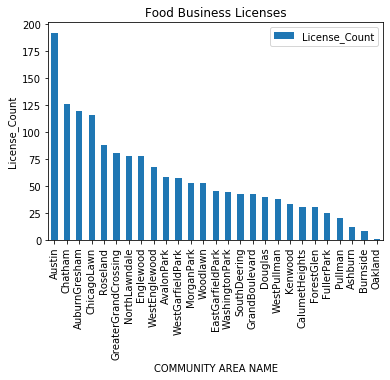

In [66]:
high_license.plot(kind = 'bar', x = 'COMMUNITY NO SPACES', y = 'License_Count')

plt.xlabel('COMMUNITY AREA NAME')
plt.ylabel('License_Count')
plt.title ('Food Business Licenses')

plt.show()

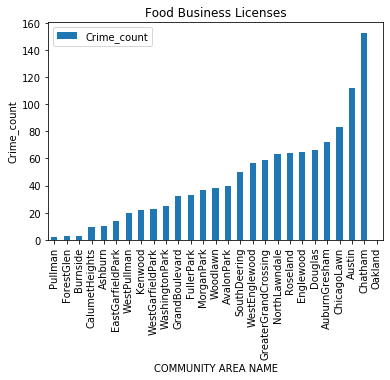

In [67]:
low_crime.plot(kind = 'bar', x = 'COMMUNITY NO SPACES', y = 'Crime_count')

plt.xlabel('COMMUNITY AREA NAME')
plt.ylabel('Crime_count')
plt.title ('Food Business Licenses')

plt.show()

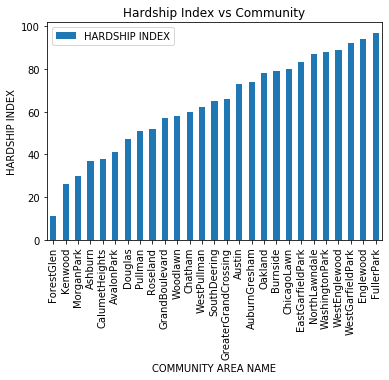

In [68]:
low_hardship.plot(kind = 'bar', x = 'COMMUNITY NO SPACES', y = 'HARDSHIP INDEX')

plt.xlabel('COMMUNITY AREA NAME')
plt.ylabel('HARDSHIP INDEX')
plt.title ('Hardship Index vs Community')

plt.show()

In [69]:
asian_pop = Cluster_0[['COMMUNITY NO SPACES','Percent Non_ Hispanic Asian']]

In [70]:
asian_pop_list = Cluster_0['Percent Non_ Hispanic Asian'].to_list()

In [71]:
counter = 0

for i in asian_pop_list:
    if not isinstance( i, str) : 
        asian_pop.iloc[counter, 1]= 0
    else: 
        j = i.split("%")
        asian_pop.iloc[counter, 1]= int(j[0])
    counter = counter +1

/Users/Vishnu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/Vishnu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [72]:
high_asian_pop = asian_pop.sort_values(by = ['Percent Non_ Hispanic Asian'], ascending = False).reset_index(drop = True)[0:40]


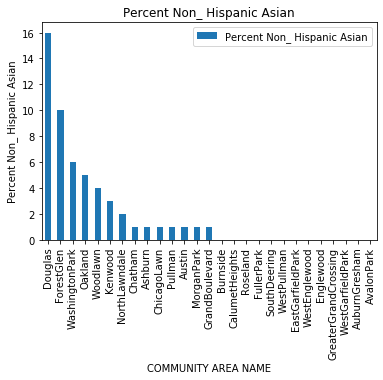

In [73]:
high_asian_pop.plot(kind = 'bar', x = 'COMMUNITY NO SPACES', y = 'Percent Non_ Hispanic Asian')

plt.xlabel('COMMUNITY AREA NAME')
plt.ylabel('Percent Non_ Hispanic Asian')
plt.title ('Percent Non_ Hispanic Asian')

plt.show()

In [74]:
common_community = pd.merge(high_license.iloc[0:15,],low_crime.iloc[0:15,], how = 'inner', on = 'COMMUNITY NO SPACES' )
common_community = pd.merge(common_community,low_hardship.iloc[0:15,], how = 'inner', on = 'COMMUNITY NO SPACES' )
common_community = pd.merge(common_community,high_asian_pop.iloc[0:15,], how = 'inner', on = 'COMMUNITY NO SPACES' )

In [75]:
common_community


,COMMUNITY NO SPACES,License_Count,Crime_count,HARDSHIP INDEX,Percent Non_ Hispanic Asian
0,MorganPark,53.0,37.0,30,1
1,Woodlawn,53.0,38.0,58,4


In [97]:
common_communities = common_community['COMMUNITY NO SPACES'].to_list()

In [98]:
common_communities

['MorganPark', 'Woodlawn']

In [76]:
# coordinates of chicago

latitude = 41.881832

longitude = -87.623177
kclusters=3

In [78]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]


colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df['Latitude'], df['Longitude'], df['COMMUNITY NO SPACES'], df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [108]:
grouped_cluster = grouped[['COMMUNITY NO SPACES','Indian Restaurant','Cluster Labels']]

In [109]:
df_coords = df[['COMMUNITY NO SPACES','Latitude','Longitude']]

In [110]:
cluster_0_coord = grouped_cluster.join(df_coords.set_index('COMMUNITY NO SPACES'), on = 'COMMUNITY NO SPACES')

In [112]:
cluster_0_coord= cluster_0_coord.loc[cluster_0_coord['Cluster Labels'] == 0,]

In [113]:
cluster_0_coord.shape

(27, 5)

In [121]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(2)
ys = [i + x + (i*x) for i in range(2)]


colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi in zip(cluster_0_coord['Latitude'], cluster_0_coord['Longitude'], cluster_0_coord['COMMUNITY NO SPACES']):
    label = folium.Popup(str(poi) , parse_html=True)
    if poi in common_communities:
        cluster=1
    else:
        cluster=0
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters